In [26]:
'''
 * User: Hojun Lim
 * Date: 2020-06-18
'''
import numpy as np

import numpy as np
import pprint as pp
import matplotlib.pyplot as plt

#### Exercise 10.1.1
SampleN= 500 points for each Gaussian. Put all 3N points as rows in a matrixA

In [11]:
mean = np.array([[3,0,0], [-1,1,0], [-1,-1,0]])
variance = np.array([3/4,1/4, 1/4])
cov = np.asarray([np.diag([variance[i],variance[i],variance[i]]) for i in range(len(variance))] )

print('mean:')
pp.pprint(mean)

print('covariance matrices:')
pp.pprint(cov)

A = np.array([])
A = np.random.multivariate_normal(mean[0], cov[0], 300)
A = np.concatenate((A,np.random.multivariate_normal(mean[1], cov[1], 300)), axis=0  ) 
A = np.concatenate((A,np.random.multivariate_normal(mean[2], cov[2], 300)), axis=0  )

print('shape of A:' , np.shape(A))
print('Matrix A = ')
pp.pprint(A)


mean:
array([[ 3,  0,  0],
       [-1,  1,  0],
       [-1, -1,  0]])
covariance matrices:
array([[[0.75, 0.  , 0.  ],
        [0.  , 0.75, 0.  ],
        [0.  , 0.  , 0.75]],

       [[0.25, 0.  , 0.  ],
        [0.  , 0.25, 0.  ],
        [0.  , 0.  , 0.25]],

       [[0.25, 0.  , 0.  ],
        [0.  , 0.25, 0.  ],
        [0.  , 0.  , 0.25]]])


#### Exercise 10.1.2
Project all points to the x-y-plane and plot the result. What do you observe?
-> points are roughly clustered.


Text(0, 0.5, 'y axis')

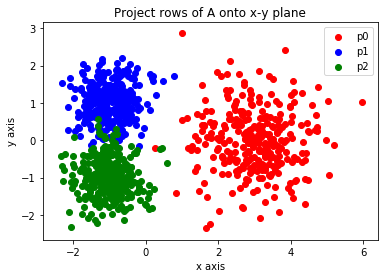

In [42]:

plt.scatter(A[:300,0], A[:300,1], color='r', label='p0'  )
plt.scatter(A[300:600,0], A[300:600,1], color='b', label='p1'  )
plt.scatter(A[600:900,0], A[600:900,1], color='g' , label='p2' )
plt.legend()
plt.title('Project rows of A onto x-y plane')
plt.xlabel('x axis')
plt.ylabel('y axis')



#### Exercise 10.1.3
Project all points to the y-z-plane and plot the result. What do you observe?
-> unlike previous observation, here we can't clearly see the cluster centers. It is hard to distinguish points from points different Gaussians.

Text(0, 0.5, 'z axis')

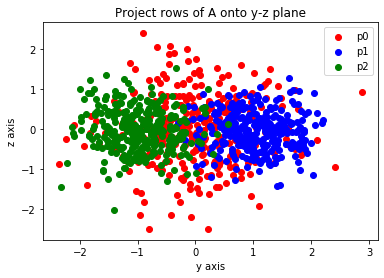

In [43]:

plt.scatter(A[:300,1], A[:300,2], color='r', label='p0' )
plt.scatter(A[300:600,1], A[300:600,2], color='b',label='p1'  )
plt.scatter(A[600:900,1], A[600:900,2], color='g', label='p2'  )
plt.legend()
plt.title('Project rows of A onto y-z plane')
plt.xlabel('y axis')
plt.ylabel('z axis')

#### Exercise 10.1.4

Determine each centroid and compare to μi

In [61]:
p0 = A[:300,:]
p1 = A[300:600, :]
p2 = A[600:900, :]

centroid= np.asarray([np.divide(np.sum(p0, axis=0), 300),np.divide(np.sum(p1, axis=0), 300), np.divide(np.sum(p2, axis=0), 300)])
print('Centroid:')
pp.pprint(centroid)

print('mean:')
pp.pprint(mean)

Centroid:
array([[ 3.00223059, -0.00450644, -0.0049789 ],
       [-0.99682867,  1.03839831, -0.04751313],
       [-1.02784084, -0.97857366, -0.00559472]])
mean:
array([[ 3,  0,  0],
       [-1,  1,  0],
       [-1, -1,  0]])


#### Exercise 10.1.5
Compute the singular value decomposition of A. Can you identify the (affine) subspace spanned by the |ci〉?

-> By performing SVD of A, we can obtain singular vectors v0, v1, v2 as below. 
If we compute 2-truncated A then the best-fit-2 subspace will be almost like x-y plane since the z-coordinate of v0 and v1 is close to 0.


Since |c_{i}〉 is approximation of |\mu_{i}〉 and z-coordinate of all |c_{i}〉 is zero, the space that is spanned by all |c_{i}〉 will be x-y plane. 

  

In [72]:
u, sv, v = np.linalg.svd(A, full_matrices=False)
print("the first singular vector: ", v[0])
print("the second singular vector: ", v[1])

the first singular vector:  [-0.99998004  0.00443548 -0.00449978]
the second singular vector:  [-0.00450154 -0.99988067  0.01477799]
